Task:\
-Smooth map using Gaussian filtre.\
-Pick out 20000 hot and 20000 cold points on map\
-In local peak of angular size 5x5 degrees, calculate T, Qr and Ur and add

In [8]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import camb
import healpy as hp
from camb import model, initialpower

planck2018pars = camb.read_ini("planck_2018.ini")
planck2018 = camb.get_results(planck2018pars)

In [9]:
# unnormalised Cl
powers = planck2018.get_cmb_power_spectra(planck2018pars, CMB_unit="muK", raw_cl=True)

# total power spectrum
aCl_Total = powers["total"]

# l starts from 0 (monopole)
lmax = aCl_Total.shape[0] - 1
# l steps
aL = np.arange(lmax + 1)

In [12]:
almT, almE, almB = hp.synalm(
    [
        np.array(aCl_Total[:, 0]),
        np.array(aCl_Total[:, 1]),
        np.array(aCl_Total[:, 2]),
        np.array(aCl_Total[:, 3]),
    ],
    new=True,
)
sharp_map = hp.alm2map([almT, almE, almB], nside=512)
smooth = hp.smoothing(sharp_map, 0.5 * np.pi / 180)
print(np.min(smooth[0]), np.max(smooth[0]))
print(np.min(smooth[1]), np.max(smooth[1]))
print(np.min(smooth[2]), np.max(smooth[2]))

-412.99583858298774 408.04073529166266
-5.552872304452862 5.5730593788613705
-5.606454693456497 5.467347028727856


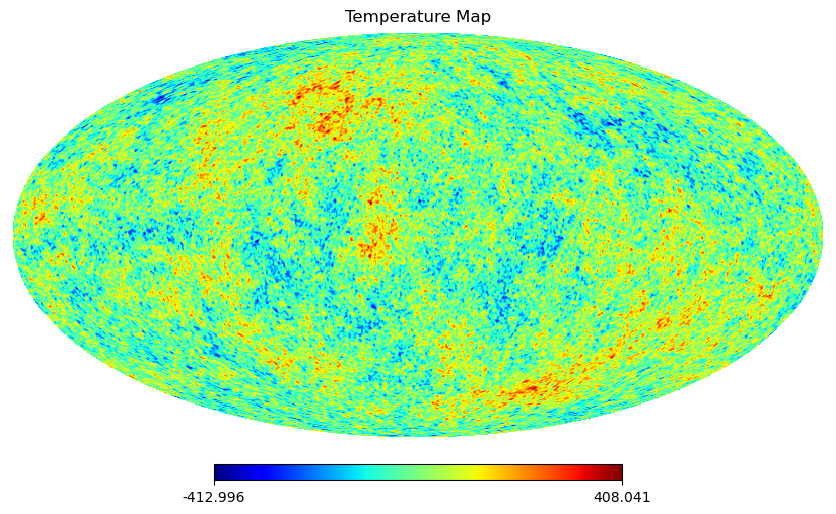

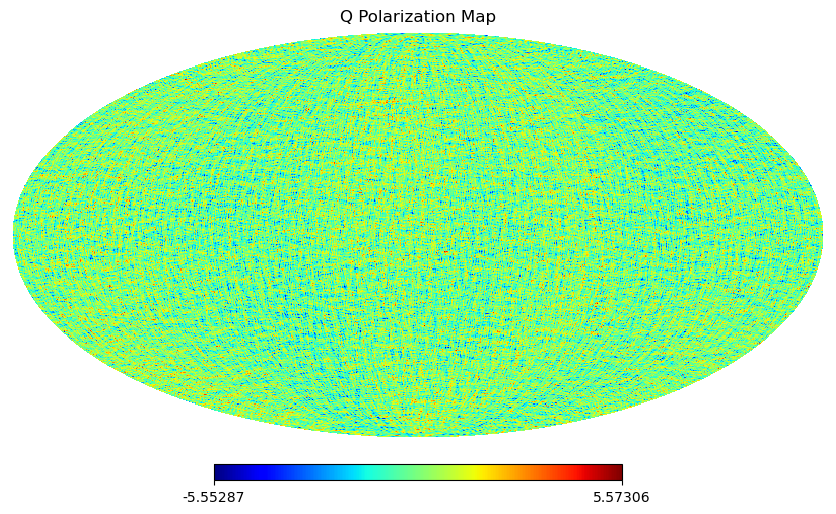

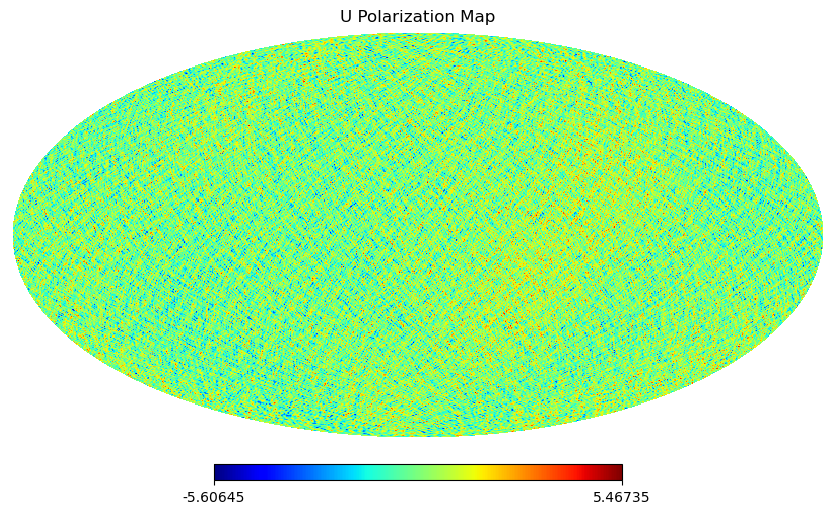

In [14]:
hp.mollview(
    smooth[0],
    max=np.max(smooth[0]),
    min=np.min(smooth[0]),
    cmap="jet",
    title="Temperature Map",
)
hp.mollview(
    smooth[1],
    max=np.max(smooth[1]),
    min=np.min(smooth[1]),
    cmap="jet",
    title="Q Polarization Map",
)
hp.mollview(
    smooth[2],
    max=np.max(smooth[2]),
    min=np.min(smooth[2]),
    cmap="jet",
    title="U Polarization Map",
)

In [ ]:
max_idx = np.argmax(smooth)
max_ra, max_dec = hp.pix2ang(512, max_idx, lonlat=True)